# 01 - Tuto xarray

This notebook is set to familiarize with the `xarray` package that you will have to use in other notebooks.

## Constraints

+ 🚨 Only cells with the comment `# NOTE: Fill me!` should be filled
+ 🚨 Notebook should be saved and commited **with** outputs for the submission


+ ⚠️ The solution only requires packages listed in the `requirements/requirements.txt`

## Note

+ The `assert` statements in the notebook are here to guide the project.
However, successful `assert` statements does not guarantee that your code is correct.


In [1]:
import xarray as xr
import pandas as pd
from pathlib import Path
from datetime import datetime

%reload_ext autoreload
%autoreload 2

# 1. Parameters

In [2]:
DATA_PATH = Path("C:/Users/channa/Downloads/data-scientist-technical-test-main/data-scientist-technical-test-main/data")
RASTER_PATH = DATA_PATH / "rasters"
CSV_PATH = DATA_PATH / "csv"

# 2. Data

## 2.1 Download data

In [3]:
raster_path = RASTER_PATH / "raster_test.nc"

## 2.2 Load data

`xarray` doc: https://tutorial.xarray.dev/intro.html

`xarray.DataArray` is xarray’s implementation of a labeled, multi-dimensional array. It has several key properties:

- values: a numpy.ndarray holding the array’s values

- dims: dimension names for each axis (e.g., ('x', 'y', 'z'))

- coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)

- attrs: dict to hold arbitrary metadata (attributes)

`xarray.Dataset`

A dict-like collection of `DataArray` objects with aligned dimensions. Thus, most operations that can be performed on the dimensions of a single `DataArray` can be performed on a dataset. Datasets have data variables (see Variable below), dimensions, coordinates, and attributes.

⚠️ **In the following and in all notebooks, the term raster will denominate a `xarray.DataArray` or `xarray.Dataset`** ⚠️

In [4]:
raster = xr.open_dataset(raster_path).drop("spatial_ref")
raster

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 4, time: 365)
Coordinates:
  * longitude  (longitude) float64 147.1 147.2 147.3 147.4 147.5
  * latitude   (latitude) float64 -42.34 -42.45 -42.55 -42.66
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Data variables:
    max_temp   (time, latitude, longitude) float32 ...
    avg_temp   (time, latitude, longitude) float32 ...

Here the raster is composed of 3 coordinates (`longitude`, `latitude` and `time`) and has 2 variables:
- `max_temp`: maximum temperature over one day
- `avg_temp`: average temperature over one day

# 3. Familiarize with xarray

You can have a look at the xarray doc for indexing and selecting: https://docs.xarray.dev/en/stable/user-guide/indexing.html

#### Let's now look at the variables: for example max_temp

It is a `xarray.DataArray`

In [5]:
raster["max_temp"]

<xarray.DataArray 'max_temp' (time: 365, latitude: 4, longitude: 5)>
[7300 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 147.1 147.2 147.3 147.4 147.5
  * latitude   (latitude) float64 -42.34 -42.45 -42.55 -42.66
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  spatial_ref

Let's say we want to select the grid cell at position [0,0], then it becomes as follows:

In [6]:
raster["max_temp"][dict(longitude=0, latitude=0)]

<xarray.DataArray 'max_temp' (time: 365)>
[365 values with dtype=float32]
Coordinates:
    longitude  float64 147.1
    latitude   float64 -42.34
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  spatial_ref

And we can plot the timeseries over the year 2010:

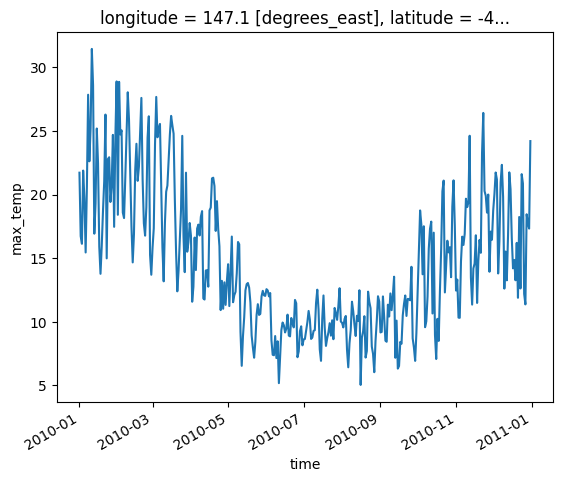

In [7]:
raster["max_temp"][dict(longitude=0, latitude=0)].plot()

If we now want to get the value for July, 1st of 2010:

In [8]:
raster["max_temp"][dict(longitude=0, latitude=0)].sel(dict(time=datetime(2010, 7, 1))).values

array(8.619507, dtype=float32)

#### Similarly, let's say, we have the coordinates (longitude and latitude) of a point and we want to know the min and mean temperature on the 5th of December 2010:

The coordinates here at in the geodesic Coordinate reference system (CRS)

For more info on CRS, please have a look at: https://docs.qgis.org/3.22/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

In [9]:
point_latitude = -42.5776
point_longitude = 147.3224
point_date = datetime(2010, 12, 5)

print(point_latitude)

-42.5776


In [10]:
raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float64 147.3
    latitude   float64 -42.55
    time       datetime64[ns] 2010-12-05
Data variables:
    max_temp   float32 ...
    avg_temp   float32 ...

And let's say, you want to access the mean temperature:

In [11]:
point_avg_temp = raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)["avg_temp"].values
point_avg_temp

array(4.9108887, dtype=float32)

# 4. Task

Your task here is to find the corresponding features associated to an ignition point. More precisely, you need to determine the elevation, population density, maximum and average temperature at the location of the ignition point and the day it occurred.

## 4.1 Load data

### 4.1.1 Rasters

In [12]:
topo_path = RASTER_PATH / "topo.nc"
weather_path = RASTER_PATH / "weather.nc"

In [13]:
topo_xr = xr.load_dataset(topo_path)
weather_xr = xr.load_dataset(weather_path)
topo_xr

<xarray.Dataset>
Dimensions:      (longitude: 241, latitude: 189, band: 1)
Coordinates:
  * longitude    (longitude) float64 147.0 147.0 147.0 ... 147.6 147.6 147.6
  * latitude     (latitude) float64 -42.3 -42.31 -42.31 ... -42.81 -42.82 -42.82
  * band         (band) int64 1
Data variables:
    spatial_ref  int64 0
    elevation    (band, latitude, longitude) float64 nan nan nan ... nan nan nan
    pop_dens     (band, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    _FillValue:    nan
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     aspect

### 4.1.2 Ignition point

In [14]:
ignition_point_path = CSV_PATH / "ignition_points.csv"

In [15]:
df_ignition = pd.read_csv(ignition_point_path, index_col=0)
df_ignition

,Date,latitude,longitude
0,2002-11-11,-42.5618,147.4595


## 4.2 Map features

🚨 You need to complement the dataframe with the raster features. 🚨

You need to use the 2 rasters and extract the information corresponding to the ignition point. You have to determine the elevation, population density, maximum and average temperature at the location of the ignition point at the time of ignition.

The expected result is shown below:

In [16]:
# NOTE: Fill me
# Read the ignition point data from a CSV file into a DataFrame
df_ignition = pd.read_csv(ignition_point_path, index_col=0)
df_ignition

# Retrieve the characteristics of the ignition point
point_latitude = df_ignition.at[0, 'latitude']
point_longitude = df_ignition.at[0, 'longitude']
point_date = df_ignition.at[0, 'Date']
point_date = datetime.strptime(point_date, '%Y-%m-%d')

###### Weather ######
# Extract the average temperature for the ignition point's characteristics
point_avg_temp = weather_xr.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)["avg_temp"].values

# Extract the maximum temperature for the ignition point's characteristics
point_max_temp = weather_xr.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)["max_temp"].values

##### Topo #####
# Extract the elevation for the ignition point's characteristics
point_elevation = topo_xr.sel(
    dict(longitude=point_longitude, latitude=point_latitude),
    method="nearest",
)["elevation"].values

# Extract the population density for the ignition point's characteristics
point_pop_dens = topo_xr.sel(
    dict(longitude=point_longitude, latitude=point_latitude),
    method="nearest",
)["pop_dens"].values

##### Data frame Ignition Point #####

# Define the dataset for the ignition point and convert it to the expected format
df_ignition = pd.DataFrame({
    "Date": point_date.strftime('%Y-%m-%d'),
    "latitude": {0: point_latitude},
    "longitude": {0: point_longitude},
    "elevation": int(point_elevation),
    "pop_dens": float(point_pop_dens),
    "max_temp": float(point_max_temp),
    "avg_temp": float(point_avg_temp),
})

# Print the ignition point DataFrame
print(df_ignition)


         Date  latitude  longitude  elevation  pop_dens   max_temp  avg_temp
0  2002-11-11  -42.5618   147.4595        388  2.509037  19.283844  4.920664


C:\Users\channa\AppData\Local\Temp\ipykernel_22596\1140951432.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "elevation": int(point_elevation),
C:\Users\channa\AppData\Local\Temp\ipykernel_22596\1140951432.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "pop_dens": float(point_pop_dens),


In [17]:
expected_dataframe = pd.DataFrame(
    {
        "Date": {0: "2002-11-11"},
        "latitude": {0: -42.6},
        "longitude": {0: 147.5},
        "elevation": {0: 388},
        "pop_dens": {0: 2.5},
        "max_temp": {0: 19.3},
        "avg_temp": {0: 4.9},
    }
)

In [18]:
pd.testing.assert_frame_equal(df_ignition, expected_dataframe, rtol=1e-2)

---

# END OF SCRIPT